# Assignment 04

# Cross Validation, Grid search

### Objectives:

1. Load titanic.csv file. 

2. Select 'Pclass','SibSp','Parch','Fare' columns as data. Select ‘Survived’ column as label. 

3. Apply Logistic regression, KNN, SVM, Decision tree and random forest to classify the data. 

4. Use K-Fold Cross Validation to generalise the model accuracy. 

5. Use grid search to identify the best possible SVM model from the following search space:

* 'C': [0.1, 1, 10, 100, 1000]
* 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
* 'kernel': ['rbf']


In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## Loading Dataset 

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Inferences:**
* There are some null values in Age and Cabin columns.
* There are 891 observations and 12 features

In [4]:
#Select 'Pclass','SibSp','Parch','Fare' columns as data. Select ‘Survived’ column as label.

X = df[['Pclass','SibSp','Parch','Fare']]
y = df.Survived

In [5]:
X.head()

,Pclass,SibSp,Parch,Fare
0,3,1,0,7.2500
1,1,1,0,71.2833
2,3,0,0,7.9250
3,1,1,0,53.1000
4,3,0,0,8.0500


## Model Building

In [6]:
# Apply Logistic regression, KNN, SVM, Decision tree and random forest to classify the data.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Logisitic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('Accuracy Score:\n',accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy Score:
 0.6368715083798883
Confusion Matrix:
 [[83 19]
 [46 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.81      0.72       102
           1       0.62      0.40      0.49        77

    accuracy                           0.64       179
   macro avg       0.63      0.61      0.60       179
weighted avg       0.63      0.64      0.62       179



In [8]:
# Use K-Fold Cross Validation to generalise the model accuracy.

from sklearn.model_selection import cross_val_score,KFold
model = LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(model,X,y,cv=kf)

print("Cross Validation Scores are: {}\n".format(score))

print("Average of Cross Validation Scores: {}".format(score.mean()))

Cross Validation Scores are: [0.62569832 0.66853933 0.66853933 0.69662921 0.75280899]

Average of Cross Validation Scores: 0.6824430355909861


### KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier as knn

# next step is to find optimum k value
# so we want to create model for varied k value inorder to get accuracy of each k value.
# then proceed with model building with k value of higher accuracy

acc_val=[]
neighbors=np.arange(1,15)
for k in neighbors:
    classifier=knn(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_val.append(acc)

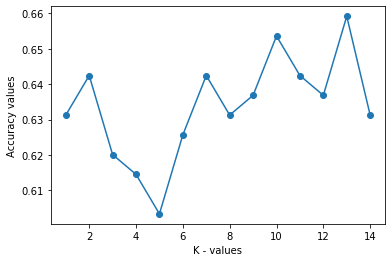

In [10]:
plt.plot(neighbors,acc_val,'o-')
plt.xlabel('K - values')
plt.ylabel('Accuracy values')
plt.show()

In [11]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=11)
model_knn.fit(X_train,y_train)

y_pred = model_knn.predict(X_test)

print('Accuracy Score:\n',accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy Score:
 0.6424581005586593
Confusion Matrix:
 [[80 22]
 [42 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.78      0.71       102
           1       0.61      0.45      0.52        77

    accuracy                           0.64       179
   macro avg       0.63      0.62      0.62       179
weighted avg       0.64      0.64      0.63       179



In [12]:
# Use K-Fold Cross Validation to generalise the model accuracy.

from sklearn.model_selection import cross_val_score,KFold

kf=KFold(n_splits=5)
score=cross_val_score(model_knn,X,y,cv=kf)

print("Cross Validation Scores are: {}\n".format(score))

print("Average of Cross Validation Scores: {}".format(score.mean()))

Cross Validation Scores are: [0.60893855 0.62359551 0.65730337 0.7247191  0.74157303]

Average of Cross Validation Scores: 0.6712259117443977


### SVM

In [13]:
from sklearn.svm import SVC
model_svc = SVC(kernel='linear', C=1, gamma='auto')
model_svc.fit(X_train,y_train)

y_pred = model_svc.predict(X_test)

print('Accuracy Score:\n',accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy Score:
 0.6312849162011173
Confusion Matrix:
 [[83 19]
 [47 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.81      0.72       102
           1       0.61      0.39      0.48        77

    accuracy                           0.63       179
   macro avg       0.63      0.60      0.60       179
weighted avg       0.63      0.63      0.61       179



In [14]:
# Use K-Fold Cross Validation to generalise the model accuracy.

from sklearn.model_selection import cross_val_score,KFold

kf=KFold(n_splits=5)
score=cross_val_score(model_svc,X,y,cv=kf)

print("Cross Validation Scores are: {}\n".format(score))

print("Average of Cross Validation Scores: {}".format(score.mean()))

Cross Validation Scores are: [0.61452514 0.65730337 0.66292135 0.7247191  0.74719101]

Average of Cross Validation Scores: 0.6813319942250958


### Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print('Accuracy Score:\n',accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy Score:
 0.6201117318435754
Confusion Matrix:
 [[83 19]
 [49 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.81      0.71       102
           1       0.60      0.36      0.45        77

    accuracy                           0.62       179
   macro avg       0.61      0.59      0.58       179
weighted avg       0.61      0.62      0.60       179



In [16]:
# Use K-Fold Cross Validation to generalise the model accuracy.

from sklearn.model_selection import cross_val_score,KFold

kf=KFold(n_splits=5)
score=cross_val_score(clf,X,y,cv=kf)

print("Cross Validation Scores are: {}\n".format(score))

print("Average of Cross Validation Scores: {}".format(score.mean()))

Cross Validation Scores are: [0.67597765 0.64044944 0.69662921 0.70224719 0.73033708]

Average of Cross Validation Scores: 0.68912811499592


### Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators = 100)
rf_clf.fit(X_test,y_test)

y_pred = rf_clf.predict(X_test)

print('Accuracy Score:\n',accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy Score:
 0.8603351955307262
Confusion Matrix:
 [[88 14]
 [11 66]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88       102
           1       0.82      0.86      0.84        77

    accuracy                           0.86       179
   macro avg       0.86      0.86      0.86       179
weighted avg       0.86      0.86      0.86       179



In [18]:
# Use K-Fold Cross Validation to generalise the model accuracy.

from sklearn.model_selection import cross_val_score,KFold

rf_clf = RandomForestClassifier(random_state=42, n_estimators = 100)
kf=KFold(n_splits=5)
score=cross_val_score(rf_clf,X,y,cv=kf)

print("Cross Validation Scores are: {}\n".format(score))

print("Average of Cross Validation Scores: {}".format(score.mean()))

Cross Validation Scores are: [0.63687151 0.64044944 0.68539326 0.73595506 0.73033708]

Average of Cross Validation Scores: 0.6858012679681125


### Hyper Parameter Tunning using Grid Search CV

In [19]:
#Use grid search to identify the best possible SVM model from the following search space:

#'C': [0.1, 1, 10, 100, 1000]
#'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
#'kernel': ['rbf']

search_space ={'C': [0.1, 1, 10, 100, 1000],
     'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
     'kernel': ['rbf']}

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(
    SVC(), 
    search_space, 
    cv=5,
    scoring='accuracy',n_jobs=-1)

In [20]:
grid_result = grid_search.fit(X_train,y_train)

In [21]:
print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

Best Params:  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best Score:  0.7232739091894022


In [22]:
# Rebuilding SVM model based on the best params obtained from grid search CV

model_svc = SVC(kernel='rbf', C=1000, gamma=0.1)
model_svc.fit(X_train,y_train)

y_pred = model_svc.predict(X_test)

print('Accuracy Score:\n',accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy Score:
 0.6871508379888268
Confusion Matrix:
 [[91 11]
 [45 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.89      0.76       102
           1       0.74      0.42      0.53        77

    accuracy                           0.69       179
   macro avg       0.71      0.65      0.65       179
weighted avg       0.70      0.69      0.67       179



In [23]:
kf=KFold(n_splits=5)
score=cross_val_score(model_svc,X,y,cv=kf)

print("Cross Validation Scores are: {}\n".format(score))

print("Average of Cross Validation Scores: {}".format(score.mean()))

Cross Validation Scores are: [0.67039106 0.63483146 0.75280899 0.70224719 0.7752809 ]

Average of Cross Validation Scores: 0.7071119201556713


**Model Evaluation (based on K-Fold Cross Validation score):**

|Model|K-Fold Cross Validation Score|
|-|-|
|Logistic Regression|0.6824|
|KNN|0.6712|
|SVM|0.6813|
|Decision Tree|0.6880|
|Random Forest|0.6858|

* After performing **Grid Search for SVM**, we got accuracy score of **70.71%**


##### Jibin K Joy, ML & AI, KKEM August 2022 Batch